# EPSS M71 Final Exam
## Miranda Chang, 12/17/20

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
year1, g1 = np.loadtxt("Final-Upload/DATA/axdip_3k.4", unpack = True) #loading data from axdip_3k.4

year2, g2 = np.loadtxt("Final-Upload/DATA/gufm_coeffs.dat", usecols = (0,1), unpack = True) #loading data from gufm_coeffs.dat
BA_1840 = (year2 > 1839) #taking data from 1840 and onward
year2 = year2[BA_1840]
g2 = g2[BA_1840]

AA = np.loadtxt("Final-Upload/DATA/IGRF13_AxDip.txt", unpack = False) #loading in IGRF13_AxDip.txt
year3 = AA[0] #unpacking the 2D array into two 1D arrays
g3 = AA[1]



[-2000. -1999. -1998. ...  1988.  1989.  1990.]


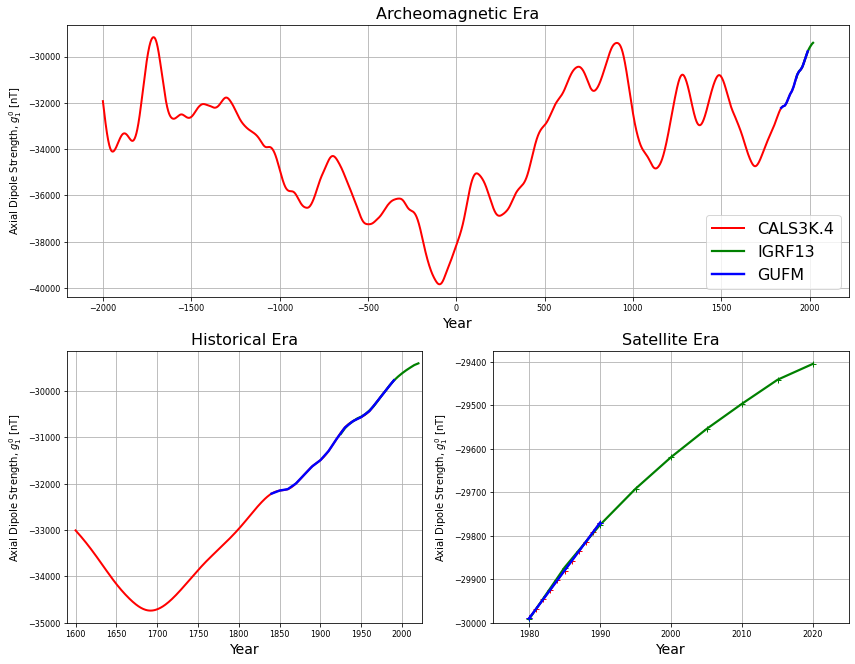

In [149]:
plt.figure(figsize = (14,11))

#assortment of labels, markers, symbols
colors_marks = ['r-', 'g-', 'b-']
satellite_clrsm = ['r+-', 'g+-', 'b+-']
years = [year1, year3, year2] #data for years
gs = [g1, g3, g2] # the g's
titles = ["Archeomagnetic Era", "Historical Era", "Satellite Era"]
labels = ["CALS3K.4", "IGRF13", "GUFM"]
lw = [2, 2.2, 2.4] #different linewidths
x_mins = [1600, 1980] #boolean condition
xlims = [1600 - 10, 1980 - 5] #how the axes will extend to
ylims = [-35000, -30000]

#font size
fs = 16
tickfs = 8

for x in [0, 1, 2]:
    if (x == 0): #first subplot
        plt.subplot(2, 1, 1) #looping through the data and labels
        for s in[0, 1, 2]:
            plt.plot(years[s], gs[s], colors_marks[s], label = labels[s], linewidth = lw[s])
        plt.legend(loc = "lower right", fontsize = fs)
    else: #second and third subplots
        plt.subplot(2, 2, x + 2)
        for s in[0, 1, 2]:
            year_limit = (years[s] >= x_mins[x - 1]) #boolean condition for each era
            years[s] = (years[s])[year_limit]
            gs[s] = (gs[s])[year_limit]
            if(x == 2): #second subplot uses +, separate markers from the rest
                plt.plot(years[s], gs[s], satellite_clrsm[s], linewidth = lw[s])
            else:
                plt.plot(years[s], gs[s], colors_marks[s], linewidth = lw[s])
        plt.xlim(xlims[x - 1], 2025)
        plt.ylim(ylims[x - 1])
    
    plt.xticks(fontsize = tickfs)
    plt.yticks(fontsize = tickfs)
    
    #titles, axes and such
    plt.title(titles[x], fontsize = fs)
    plt.xlabel("Year", fontsize = 14)
    plt.ylabel("Axial Dipole Strength, $g^0_1$ [nT]")
    plt.grid()

plt.savefig("Chang_DataF20.png", dpi = 150)

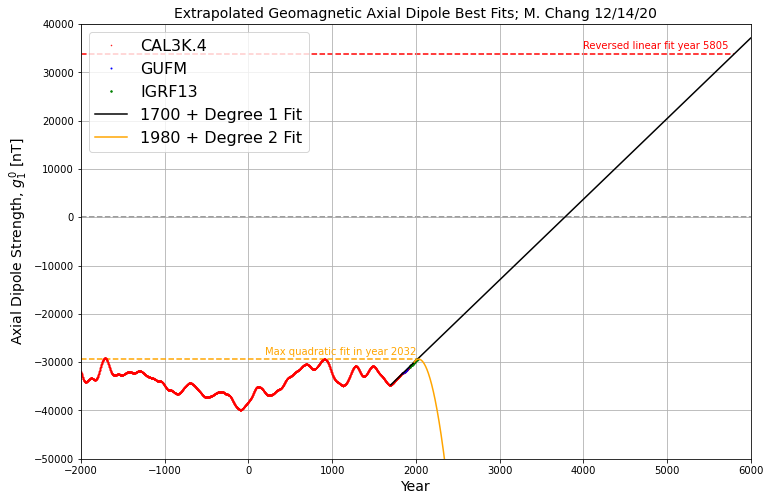

In [142]:
plt.figure(figsize = (12, 8))

#plotting the data
plt.plot(year1, g1, 'ro', markersize= 0.5, label = "CAL3K.4")
plt.plot(year2, g2, 'bo', markersize = 1, label = "GUFM")
plt.plot(year3, g3, 'go', markersize = 1.5, label = "IGRF13")

#creating the fit line for data past 1700

#boolean conditions
year1_1700_BA = (year1 >= 1700)
year2_1700_BA = (year2 >= 1700)
year3_1700_BA = (year3 >= 1700)

#picking out the data that is 1700 and up for both years and g's
year1_1700 = year1[year1_1700_BA]
g1_1700 = g1[year1_1700_BA]
year1_1700 = list(year1_1700)
g1_1700 = list(g1_1700)

year2_1700 = year2[year2_1700_BA]
g2_1700 = g2[year2_1700_BA]
year2_1700 = list(year2_1700)
g2_1700 = list(g2_1700)

year3_1700 = year3[year3_1700_BA]
g3_1700 = g3[year3_1700_BA]
year3_1700 = list(year3_1700)
g3_1700 = list(g3_1700)

#appending all data together
after_1700_years = year1_1700 + year2_1700 + year3_1700
after_1700_g = g1_1700 + g2_1700 + g3_1700

#getting coefficients for the linear fit line
coeffs_linear = np.polyfit(after_1700_years, after_1700_g, 1)
m = coeffs_linear[0]
b = coeffs_linear[1]

#x axis points going from 1700 - 6000
data_points = np.linspace(1700, 6000, 1000)
#creating the fit line by hand
g = m*data_points + b

#plotting linear fit line
plt.plot(data_points, g, 'k', label = "1700 + Degree 1 Fit")

#creating quadratic curve

#boolean condition for data 1980 and above
year1_1980_BA = (year1 >= 1980)
year2_1980_BA = (year2 >= 1980)
year3_1980_BA = (year3 >= 1980)

#picking out data that is 1980 and above for both years and g's
year1_1980 = year1[year1_1980_BA]
g1_1980 = g1[year1_1980_BA]
year1_1980 = list(year1_1980)
g1_1980 = list(g1_1980)

year2_1980 = year2[year2_1980_BA]
g2_1980 = g2[year2_1980_BA]
year2_1980 = list(year2_1980)
g2_1980 = list(g2_1980)

year3_1980 = year3[year3_1980_BA]
g3_1980 = g3[year3_1980_BA]
year3_1980 = list(year3_1980)
g3_1980 = list(g3_1980)

#appending items together
after_1980_years = year1_1980 + year2_1980 + year3_1980
after_1980_g = g1_1980 + g2_1980 + g3_1980

#getting coefficients for quadratic
coeffs_quadratic = np.polyfit(after_1980_years, after_1980_g, 2)
a = coeffs_quadratic[0]
d = coeffs_quadratic[1]
c = coeffs_quadratic[2]

#x axis points going from 1980 to 6000
data_points_quadratic = np.linspace(1980, 6000, 1000)
#recreating quadratic by hand
g_quadratic = a*(data_points_quadratic)**2 + d*(data_points_quadratic) + c
#plotting line
plt.plot(data_points_quadratic, g_quadratic, color='orange', label = "1980 + Degree 2 Fit")

#finding where mean of g of CALS3K.4 intersects fit line
#we can find this value via the y = mx + b line we created by plugging in y, and solving it for x
g_value = np.abs(np.mean(g1))
year_value = (g_value - b) / m
#plotting the red dotted line
plt.hlines(y = np.abs(np.mean(g1)), xmin = -2000, xmax = year_value, color = "red", linestyle = "--", zorder = -2)

#plotting the gray line where g = 0
plt.axhline(y = 0, color = "grey", linestyle = '--', zorder = -2)

#finding where the max of the quadratic is via boolean slicing
g_value_quadratic_BA = (g_quadratic == np.max(g_quadratic))
year_max = data_points_quadratic[g_value_quadratic_BA]
#plotting the orange dotted line where y = max of quadratic
plt.hlines(y = np.max(g_quadratic), xmin = -2000, xmax = year_max, color = "orange", linestyle = "--")

year_max = int(year_max)
#plotting text with estimate years that satisfy the lines
plt.text(4000, np.abs(np.mean(g1)) + 1000, "Reversed linear fit year {0:0.0f}".format(year_value), color = "red")
plt.text(200, np.max(g_quadratic) + 1000, "Max quadratic fit in year {0:0.0f}".format(year_max), color = "orange")

plt.xlim(-2000, 6000)
plt.ylim(-50000, 40000)

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Axial Dipole Strength, $g^0_1$ [nT]", fontsize = 14)
plt.title("Extrapolated Geomagnetic Axial Dipole Best Fits; M. Chang 12/14/20", fontsize = 14)

plt.legend(fontsize = 16)
plt.grid()

plt.savefig("Chang_FitsF20.png", dpi=150)

I don't believe it is reversing because based on the data, while it fluctuates, it still has not crossed over the g = 0 line. I don't think the fit line is particuarly accurate because it's going off of a linear uptick based on just a couple hundred years worth of data. I believe the g will still be in the negative region that it has so far been.

I did not receive help on this exam -- Miranda Chang